In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [17]:
features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Age', 'Embarked']
x_train = train_data[features]
x_test = test_data[features]
x_train['Fare'] = (x_train['Fare'] - 32.) / 50.
x_test['Fare'] = (x_train['Fare'] - 32.) / 50.
x_train['Age'] = (x_train['Age'] - 29.7) / 14.5
x_test['Age'] = (x_train['Age'] - 29.7) / 14.5
x_train['Age'] = x_train['Age'].fillna(0.)
x_test['Age'] = x_train['Age'].fillna(0.)
x_train['EmbarkedQ'] = (x_train['Embarked'] == 'Q')
x_train['EmbarkedS'] = (x_train['Embarked'] == 'S')
x_train['EmbarkedC'] = (x_train['Embarked'] == 'C')
x_train.drop(['Embarked'],axis=1,inplace=True)
x_test['EmbarkedQ'] = (x_test['Embarked'] == 'Q')
x_test['EmbarkedS'] = (x_test['Embarked'] == 'S')
x_test['EmbarkedC'] = (x_test['Embarked'] == 'C')
x_test.drop(['Embarked'],axis=1,inplace=True)
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = train_data['Survived'].to_numpy()
x_train[:,1] = (x_train[:,1] == "female")
x_test[:,1] = (x_test[:,1] == "female")
x_train = x_train.astype(np.float)
x_test = x_test.astype(np.float)
y_train = y_train.astype(np.int)
indices = np.arange(x_train.shape[0])
np.random.shuffle(indices)
x_train = x_train[indices,:]
y_train = y_train[indices]
x_eval = x_train[800:,:]
y_eval = y_train[800:]
x_train = x_train[:800,:]
y_train = y_train[:800]
x_train
x_train.shape, y_train.shape, x_eval.shape, y_eval.shape

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

((800, 9), (800,), (91, 9), (91,))

In [35]:
keras.backend.clear_session()
model = tf.keras.models.Sequential([
                            tf.keras.layers.Dense(32,activation='relu'),
                            tf.keras.layers.Dense(16,activation='relu'),
                            tf.keras.layers.Dense(16,activation='relu'),
                            tf.keras.layers.Dense(16,activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=30, batch_size = 20, validation_data = (x_eval, y_eval))

Epoch 1/30
40/40 [==============================] - 0s 6ms/step - loss: 0.6689 - accuracy: 0.5975 - val_loss: 0.6301 - val_accuracy: 0.6484
Epoch 2/30
40/40 [==============================] - 0s 3ms/step - loss: 0.5976 - accuracy: 0.6737 - val_loss: 0.5386 - val_accuracy: 0.7692
Epoch 3/30
40/40 [==============================] - 0s 3ms/step - loss: 0.5093 - accuracy: 0.7588 - val_loss: 0.4543 - val_accuracy: 0.7802
Epoch 4/30
40/40 [==============================] - 0s 3ms/step - loss: 0.4522 - accuracy: 0.8163 - val_loss: 0.4284 - val_accuracy: 0.8242
Epoch 5/30
40/40 [==============================] - 0s 2ms/step - loss: 0.4275 - accuracy: 0.8150 - val_loss: 0.4121 - val_accuracy: 0.8022
Epoch 6/30
40/40 [==============================] - 0s 3ms/step - loss: 0.4141 - accuracy: 0.8213 - val_loss: 0.4114 - val_accuracy: 0.8022
Epoch 7/30
40/40 [==============================] - 0s 3ms/step - loss: 0.4061 - accuracy: 0.8263 - val_loss: 0.4108 - val_accuracy: 0.8132
Epoch 8/30
40/40 [==

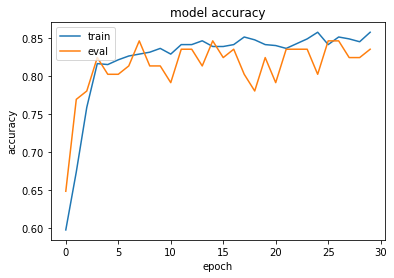

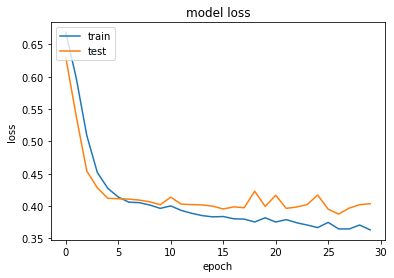

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'eval'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [34]:
predictions = (model.predict(x_test) > 0.5).astype(np.int).reshape(x_test.shape[0])
output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 1,409
Trainable params: 1,409
Non-trainable params: 0
_________________________________________________________________
